# <center>Clustering and Radial Basis Functions</center>
## <div align='right'>Made by</div>
<div align='right'>Ihor Markevych</div>

In [1]:
import pandas as pd
import sklearn.preprocessing
import sklearn.cluster
import scipy.cluster.hierarchy
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

## Problem 1

In this problem you will use the data file “kMeansData.csv” (x1 and x2 denote
the input features) to create 3 clusters using unsupervised Lloyd’s k-means
algorithm.  
The training should only stop if the difference between the cluster center
locations in two consecutive iterations is less than 0.001 or if the number of
iterations has reached 1000. For the initial selection of cluster locations choose
3 points from the data set randomly.  
After convergence, report the final cluster centers. Plot the 3 clusters in
different colors with cluster centers clearly marked on the plot.

In [2]:
class kMeans:
    
    def __init__(self, k=3, precision=0.001, maxIters=1000, initializationMethod='Forgy', nInit=10, metric='euclidian'):
        '''
        * k - number of clusters;
        
        * precision - exit creiteria, difference between the cluster center locations in two consecutive iterations;
        
        * maxIters - maximum number of iteration for training;
        
        * nInit - Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of nInit consecutive runs in terms of inertia.
        
        * initializationMethod - 'Forgy'` or 'Random Partition'. 
            'Forgy' randomly chooses k observations from the dataset and uses these as the initial means. 
            'Random Partition' first randomly assigns a cluster to each observation and then proceeds to the update step, thus computing the initial mean to be the centroid of the cluster's randomly assigned points.
        '''
        self.k = k
        self.initializationMethod = initializationMethod
        self.precision = precision
        self.maxIters = maxIters
        self.nInit = nInit
    
    def updateCentroids(self, trainX):
        return np.array([list(trainX[self.labels == i, :].mean(axis=0)) 
                for i in range(self.k)]) 
    
    def predict(self, X):
        return np.argmin(np.array([list(np.linalg.norm(np.subtract(X, c), axis=1)) 
                                   for c in self.clusterCenters]), axis=0)
        
    def cost(self, X):
        return sum([sum(np.linalg.norm(np.subtract(X[self.predict(X) == label], self.clusterCenters[label]), axis=1)) 
                    for label in range(self.k)])
    
    def train(self, trainX):
        
        bestScore = np.inf
        
        for i in range(self.nInit - 1):
            kMTemp = kMeans(k=self.k, 
                            precision=self.precision, 
                            maxIters=self.maxIters, 
                            initializationMethod=self.initializationMethod)
            kMTemp.trainOnce(trainX)
            if kMTemp.cost(trainX) < bestScore:
                kMBest = kMTemp
                bestScore = kMTemp.cost(trainX)
        
        self.histLabels = kMBest.histLabels
        self.histCenters = kMBest.histCenters
        self.clusterCenters = kMBest.clusterCenters
        self.labels = kMBest.labels
    
    def trainOnce(self, trainX):
        
        np.random.seed()
        
        self.histLabels = []
        self.histCenters = []
        
        if self.initializationMethod == 'Forgy':
            self.clusterCenters = trainX[np.random.choice(trainX.shape[0], self.k, replace=False), :]
            self.labels = self.predict(trainX)
            
            self.histCenters.append(self.clusterCenters)
            self.histLabels.append(self.labels)   
            
            
        elif self.initializationMethod == 'Random Partition':
            self.labels = np.random.randint(0, self.k, len(trainX))
            self.clusterCenters = self.updateCentroids(trainX)
            self.labels = self.predict(trainX)
            self.histCenters.append(self.clusterCenters)
            self.histLabels.append(self.labels) 
        
        
        newClusterCenters = self.updateCentroids(trainX)
        
        i = 0
        while i < self.maxIters and \
                max(np.linalg.norm(newClusterCenters - self.clusterCenters, axis=1)) > self.precision:
            self.clusterCenters = newClusterCenters
            self.labels = self.predict(trainX)
            newClusterCenters = self.updateCentroids(trainX)   
            i += 1
            self.histCenters.append(self.clusterCenters)
            self.histLabels.append(self.labels) 
        
    def plotHistory(self):
        fig = plt.figure(figsize=(5,5))
        for centers, labels in zip(self.histCenters, self.histLabels):
            ax = plt.axes()
            ax.scatter(trainX[:,0], trainX[:,1], c=labels)
            ax.scatter(centers[:,0], centers[:,1], marker='x', s=100, c='red')
            clear_output(wait=True)
            display(fig)
            time.sleep(1)
            ax.remove()
            
        plt.close()

In [3]:
data = pd.read_csv('./kMeansData.csv')

In [4]:
data

,x1,x2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [5]:
scaler = sklearn.preprocessing.StandardScaler()
trainX = scaler.fit_transform(data)

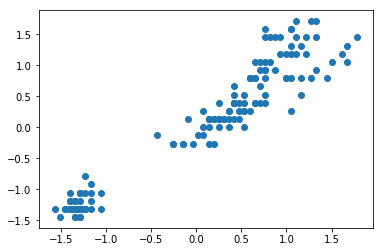

In [6]:
plt.scatter(trainX[:,0], trainX[:,1])
plt.show()

### Forgy method

In [7]:
kMeansClassifier = kMeans(k=3)
kMeansClassifier.train(trainX)
kMeansClassifier.clusterCenters

array([[ 1.02799959,  1.12797813],
       [-1.30498732, -1.25489349],
       [ 0.3058728 ,  0.16541778]])

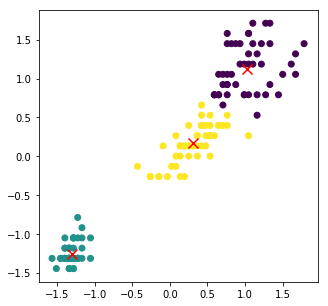

In [8]:
kMeansClassifier.plotHistory()

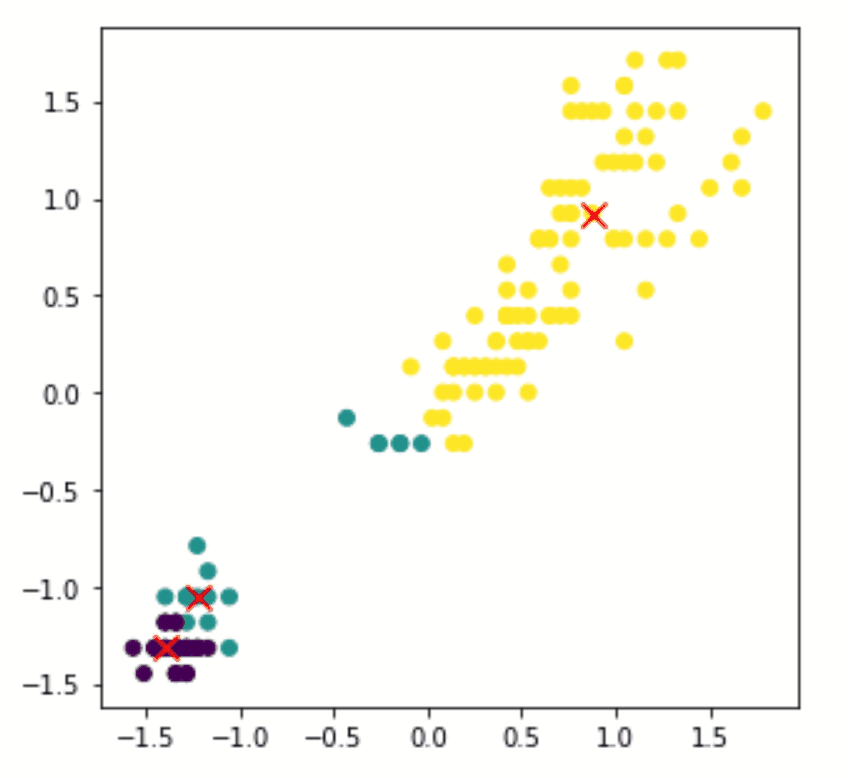

### Random partition

In [9]:
kMeansClassifier = kMeans(k=3, initializationMethod='Random Partition')
kMeansClassifier.train(trainX)
kMeansClassifier.clusterCenters

array([[-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813],
       [ 0.3058728 ,  0.16541778]])

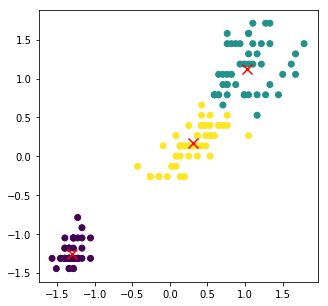

In [10]:
kMeansClassifier.plotHistory()

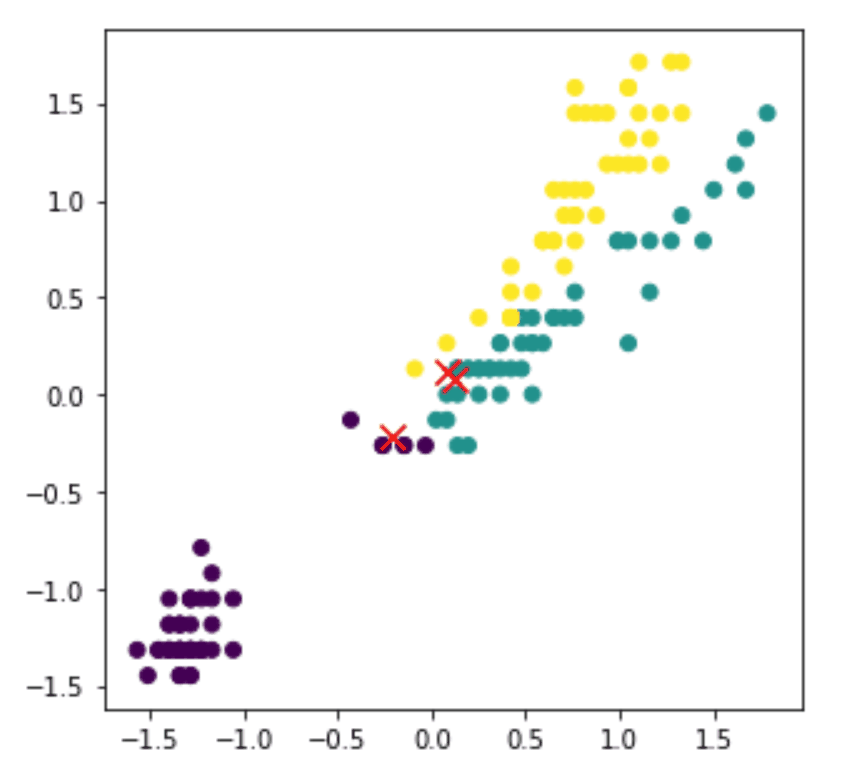

### Sklearn quick check:

In [11]:
kMeansSklearn = sklearn.cluster.KMeans(3)
kMeansSklearn.fit(trainX)
kMeansSklearn.cluster_centers_

array([[-1.30498732, -1.25489349],
       [ 0.3058728 ,  0.16541778],
       [ 1.02799959,  1.12797813]])

## Problem 2

In [12]:
data = pd.read_csv('./rbfClassification.csv')

In [13]:
data

,x1,x2,cls
0,-2.427236,1.965984,1
1,2.382605,2.256614,0
2,-2.680668,2.379979,1
3,-2.620277,2.913823,0
4,1.513792,-2.312650,0
5,2.460894,-2.295289,1
6,0.921995,-2.685112,0
7,-0.505379,-2.301417,0
8,-0.279911,-0.520869,0
9,-1.742365,2.969098,1


In [14]:
scaler = sklearn.preprocessing.StandardScaler()
trainX = scaler.fit_transform(data.loc[:, ['x1', 'x2']])
trainY = data.cls * 2 - 1

In [15]:
kMeansClassifier = kMeans(k=2)
kMeansClassifier.train(trainX)
kMeansClassifier.clusterCenters

array([[-1.16337545,  0.82429876],
       [ 0.62643293, -0.44385318]])

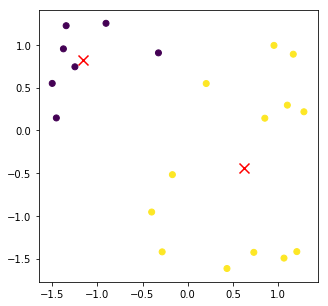

In [16]:
kMeansClassifier.plotHistory()

**Sklearn quick check:**

In [17]:
kMeansSklearn = sklearn.cluster.KMeans(2)
kMeansSklearn.fit(trainX)
kMeansSklearn.cluster_centers_

array([[ 0.62643293, -0.44385318],
       [-1.16337545,  0.82429876]])

In [3]:
class RBF:
    
    def __init__(self, gamma=0.5, k=2, nInit=10):
        self.gamma = gamma
        self.k = k
        self.nInit = nInit
    
    def gaussianKernel(self, X):
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
    
        return np.exp(- self.gamma 
                      * np.linalg.norm(
                          (np.tile(X, self.k)
                           - self.clusterCenters.reshape(1, self.k * X.shape[1])
                          ).reshape(X.shape[0], self.k, X.shape[1]), axis=2
                      ) ** 2)
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(- 1 * X))
    
    def train(self, trainX, trainY):
              
        kMeansClassifier = kMeans(k=self.k, nInit=self.nInit)
        kMeansClassifier.train(trainX)
        self.clusterCenters = kMeansClassifier.clusterCenters
                
        Fi = self.gaussianKernel(trainX)
        Fi = np.insert(Fi, 0, 1, axis=1)
        self.w = np.linalg.pinv(Fi) @ trainY
        
    def predict(self, X):
        return (self.gaussianKernel(X) @ self.w[1:] + self.w[0] > 0).astype(int) * 2 - 1
#         return (self.sigmoid(self.gaussianKernel(X) @ self.w[1:] + self.w[0]) > 0.5).astype(int) * 2 - 1

In [19]:
rbf = RBF(k=2, gamma=0.5)
rbf.train(trainX, trainY)
sum(rbf.predict(trainX) == trainY) / len(trainY)

0.85

In [20]:
rbf.w

array([ 0.44435094,  0.46207334, -2.06955319])

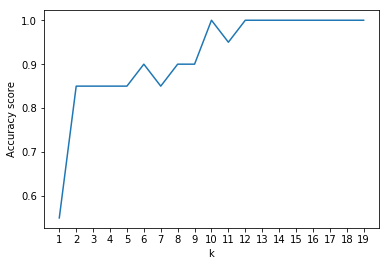

In [21]:
ks = []
rates = []
for k in range (1, 20):
    ks.append(k)
    rbf1 = RBF(k=k, gamma=0.5)
    rbf1.train(trainX, trainY)
    rates.append(sum(rbf1.predict(trainX) == trainY) / len(trainY))
    
plt.plot(ks, rates)
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('Accuracy score')
plt.show()

## Problem 3

In [4]:
def condProb(val, c, x, y):
    return sum((y[(x == val).tolist()] == c).tolist()) / len(y[(x == val).tolist()])

In [5]:
class VDM:
    
    def fitProbs(self, X, y):
        condProbs = pd.DataFrame()
        
        vals = X.unique()
        vals.sort()
        classes = y.unique()
        classes.sort()

        for val in vals:
            row = []
            for c in classes:
                row += [condProb(val, c, X, y)]
            condProbs = condProbs.append([row])
        condProbs.index = map(str, vals)
        condProbs.columns = map(str, classes)
        
        self.condProbs = condProbs

    def distance(self, val1, val2):
        
        if hasattr(self, 'distances'):
            return self.distances.loc[str(val1), str(val2)]
        else:
            temp = 0
            val1 = str(val1)
            val2 = str(val2)
            for c in self.condProbs.columns:
                c = str(c)
                temp += (self.condProbs.loc[val1, c] - self.condProbs.loc[val2, c]) ** 2
            return temp

    def fitDistances(self):
        distances = pd.DataFrame()

        vals = self.condProbs.index.values

        for val1 in vals:
            row = []
            for val2 in vals:
                row += [self.distance(val1, val2)]
            distances = distances.append([row])
        distances.index = vals
        distances.columns = vals
        self.distances = distances
        
    def fit(self, X, y):
        self.fitProbs(X, y)
        self.fitDistances()

In [6]:
data = pd.read_csv('stuFile.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
trainX = data.loc[:, data.columns[:-1]]
trainY = data.loc[:, data.columns[-1]]
trainX.drop('StuNum', axis=1, inplace=True)

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
trainX.loc[:, ['avgYearPack', 'numYearAward']] = scaler.fit_transform(trainX.loc[:, ['avgYearPack', 'numYearAward']])

Categorical variables:

In [9]:
trainX.iloc[:,2:].columns

Index(['SexCode', 'MaritalCode', 'LeadCategoryCode', 'PrevEdCode',
       'AdmRepName', 'ProgramCode', 'CitizenCode', 'IsHispanic', 'DDVeteran'],
      dtype='object')

In [10]:
for col in trainX.iloc[:,2:].columns:
    trainX[col] = trainX[col].astype(str)

In [11]:
vdms = {}

for col in trainX.iloc[:,2:].columns:
    vdm = VDM()
    vdm.fit(trainX[col], trainY)
    display(col)
    display(vdm.distances)
    display('=======================================================')
    vdms[col] = vdm

'SexCode'

,F,M
F,0.000000,0.004737
M,0.004737,0.000000


'======================================================='

'MaritalCode'

,D,M,P,S,UN,W
D,0.000000,0.001221,0.001753,0.003525,0.111414,0.004567
M,0.001221,0.000000,0.000048,0.000597,0.089306,0.001065
P,0.001753,0.000048,0.000000,0.000306,0.085216,0.000661
S,0.003525,0.000597,0.000306,0.000000,0.075302,0.000067
UN,0.111414,0.089306,0.085216,0.075302,0.000000,0.070865
W,0.004567,0.001065,0.000661,0.000067,0.070865,0.000000


'======================================================='

'LeadCategoryCode'

,BUSDEV,DIRMAIL,DISPLAY,EMAIL,INTER,INTINT,OTHER,OUTDOOR,PDSCLMDA,PPC,PRINT,RADIO,REF,TV
BUSDEV,0.000000,0.249135,0.500000,0.125000,0.128185,0.077276,0.000000,0.032250,0.391830,0.150711,0.173010,0.006820,0.052504,0.243375
DIRMAIL,0.249135,0.000000,0.043253,0.021194,0.019911,0.048907,0.249135,0.102113,0.016086,0.012303,0.006920,0.173516,0.072898,0.000034
DISPLAY,0.500000,0.043253,0.000000,0.125000,0.121855,0.184146,0.500000,0.278282,0.006584,0.101692,0.084775,0.390031,0.228454,0.045700
EMAIL,0.125000,0.021194,0.125000,0.000000,0.000020,0.005711,0.125000,0.030266,0.074207,0.001201,0.003893,0.073426,0.015479,0.019538
INTER,0.128185,0.019911,0.121855,0.000020,0.000000,0.006407,0.128185,0.031843,0.071789,0.000911,0.003354,0.075871,0.016613,0.018307
INTINT,0.077276,0.048907,0.184146,0.005711,0.006407,0.000000,0.077276,0.009683,0.121089,0.012151,0.019033,0.038182,0.002386,0.046374
OTHER,0.000000,0.249135,0.500000,0.125000,0.128185,0.077276,0.000000,0.032250,0.391830,0.150711,0.173010,0.006820,0.052504,0.243375
OUTDOOR,0.032250,0.102113,0.278282,0.030266,0.031843,0.009683,0.032250,0.000000,0.199256,0.043528,0.055867,0.009409,0.002456,0.098438
PDSCLMDA,0.391830,0.016086,0.006584,0.074207,0.071789,0.121089,0.391830,0.199256,0.000000,0.056524,0.044108,0.295264,0.157470,0.017592
PPC,0.150711,0.012303,0.101692,0.001201,0.000911,0.012151,0.150711,0.043528,0.056524,0.000000,0.000769,0.093412,0.025306,0.011049


'======================================================='

'PrevEdCode'

,ASSOC,BACH,GED,HS,INHS,MAST,SOMECOLL,UN
ASSOC,0.000000,0.008176,0.138752,0.000052,1.165537,1.165537,0.006055,0.015473
BACH,0.008176,0.000000,0.079563,0.009527,0.978471,0.978471,0.028304,0.046146
GED,0.138752,0.079563,0.000000,0.144155,0.500000,0.500000,0.202777,0.246896
HS,0.000052,0.009527,0.144155,0.000000,1.181101,1.181101,0.004989,0.013738
INHS,1.165537,0.978471,0.500000,1.181101,0.000000,0.000000,1.339609,1.449598
MAST,1.165537,0.978471,0.500000,1.181101,0.000000,0.000000,1.339609,1.449598
SOMECOLL,0.006055,0.028304,0.202777,0.004989,1.339609,1.339609,0.000000,0.002169
UN,0.015473,0.046146,0.246896,0.013738,1.449598,1.449598,0.002169,0.000000


'======================================================='

'AdmRepName'

,1,10,11,12,13,14,15,16,17,18,...,29,3,30,31,4,5,6,7,8,9
1,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
11,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
12,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
13,0.210373,0.210373,0.210373,0.210373,0.000000,0.020644,0.210373,0.210373,0.210373,0.000550,...,0.210373,0.210373,0.011454,0.007270,0.005136,0.210373,0.210373,0.023270,0.004370,0.210373
14,0.099215,0.099215,0.099215,0.099215,0.020644,0.000000,0.099215,0.099215,0.099215,0.027934,...,0.099215,0.099215,0.062851,0.052416,0.046374,0.099215,0.099215,0.000079,0.044011,0.099215
15,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
16,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
17,0.000000,0.000000,0.000000,0.000000,0.210373,0.099215,0.000000,0.000000,0.000000,0.232438,...,0.000000,0.000000,0.320000,0.295858,0.281250,0.000000,0.000000,0.093708,0.275385,0.000000
18,0.232438,0.232438,0.232438,0.232438,0.000550,0.027934,0.232438,0.232438,0.232438,0.000000,...,0.232438,0.232438,0.006983,0.003820,0.002324,0.232438,0.232438,0.030976,0.001819,0.232438


'======================================================='

'ProgramCode'

,1,2
1,0.000000,0.019743
2,0.019743,0.000000


'======================================================='

'CitizenCode'

,ELNC,N,US
ELNC,0.000000,0.013113,0.005238
N,0.013113,0.000000,0.034925
US,0.005238,0.034925,0.000000


'======================================================='

'IsHispanic'

,1,2
1,0.000000,0.000566
2,0.000566,0.000000


'======================================================='

'DDVeteran'

,0,1
0,0.000000,0.085067
1,0.085067,0.000000


'======================================================='

In [12]:
def distance(val1, val2, vdms=None):
       
    val1Num = val1.select_dtypes(include='number')
    val2Num = val2.where([not isinstance(x, str) for x in val2])
        
    dist = np.sum((val1Num - val2Num) ** 2, axis=1)

    val1Cat = val1.select_dtypes(include='object')
    val2Cat = val2.where([isinstance(x, str) for x in val2])
    val2Cat = val2Cat[val2Cat.notna()]
        
    for clmn in val1Cat.columns:
        vdmDistances = []
        for _, x in val1Cat.loc[:, clmn].iteritems():
            vdmDistances += [vdms[clmn].distance(x, val2Cat[clmn])]
        dist += np.array(vdmDistances)

    return dist ** 0.5

In [13]:
def pairwiseDist(X, vdms): 
    res = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        res[:, i] = distance(X, X.iloc[i], vdms)
    return res

In [14]:
pairs = pairwiseDist(trainX, vdms)

### Agglomerative clustering:

#### Dendrogram:

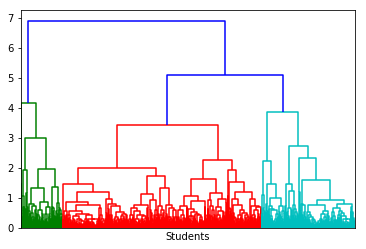

In [15]:
dn = scipy.cluster.hierarchy.dendrogram(
    scipy.cluster.hierarchy.linkage(
        scipy.spatial.distance.squareform(pairs), method='complete'))
plt.xticks([])
plt.xlabel('Students')
plt.show()

#### Silhouette score plot:

In [16]:
silScore = []
ks = []
for k in range(2, 20):
    aggClust = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='complete')
    aggClust.fit_predict(pairs)
    ks.append(k)
    silScore.append(sklearn.metrics.silhouette_score(pairs, aggClust.labels_))

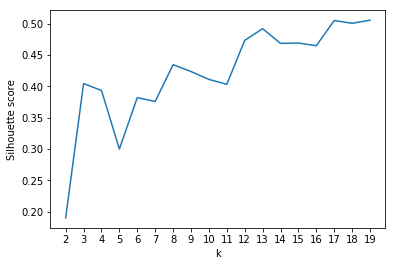

In [17]:
plt.plot(ks, silScore)
plt.xticks(ks)
plt.ylabel('Silhouette score')
plt.xlabel('k')
plt.show()

#### Elbow plot:

Here we take within-cluster sum of squares as half the sum of the within cluster squared dissimilarities divided by the cluster size.

In [18]:
def wss(pairs, labels):
     return sum([np.sum(pairs[labels == lab][:, labels == lab] ** 2) / sum(labels == lab) / 4 
                 for lab in np.unique(labels)] )

In [19]:
wsss = []
ks = []
for k in range(2, 20):
    aggClust = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='complete')
    aggClust.fit_predict(pairs)
    ks.append(k)
    wsss.append(wss(pairs, aggClust.labels_))

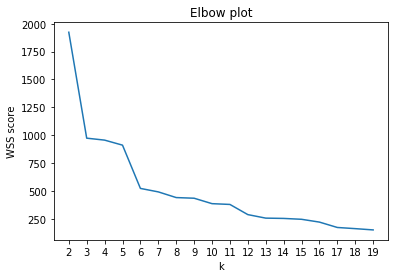

In [20]:
plt.plot(ks, wsss)
plt.xticks(ks)
plt.ylabel('WSS score')
plt.xlabel('k')
plt.title('Elbow plot')
plt.show()

Based on dendrogram, elbow plot and Silhouette score plot we can make a decision to proceed with 3 clusters.

In [24]:
aggClust = sklearn.cluster.AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
aggClust.fit_predict(pairs)

print('Cluster\t|\t Canceled\t|\t Started')
for lab in np.unique(aggClust.labels_):
    canceled = sum(trainY[aggClust.labels_ == lab])
    total = sum(aggClust.labels_ == lab)
    print(f'{lab}\t|\t {canceled} \t({int(round(canceled / total, 2) * 100)}%) \t|\t {total - canceled} \t({int(round(1 - canceled / total, 2) * 100)}%)')

Cluster	|	 Canceled	|	 Started
0	|	 34 	(12%) 	|	 251 	(88%)
1	|	 3 	(0%) 	|	 628 	(100%)
2	|	 426 	(32%) 	|	 918 	(68%)


#### Heat maps:

In [40]:
def plotHeatMap(data, labels):
    rows = []
    for lab in np.unique(labels):
        rows.append(list(data[labels == lab].value_counts(sort=False, normalize=True)[data.unique()].fillna(0)))
    plt.figure(figsize=(20,10))
    plt.imshow(pd.DataFrame(rows).T, cmap='binary')
    plt.yticks([i for i in range(len(data.unique()))], data.unique())
    plt.xticks(np.unique(labels))
    plt.xlabel('Clusters')
    plt.ylabel(data.name)
    plt.show()

##### AdmRepName

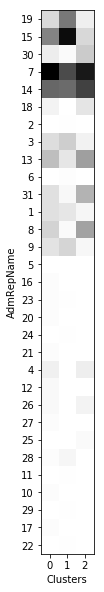

In [41]:
plotHeatMap(trainX.AdmRepName, aggClust.labels_)

##### MaritalCode

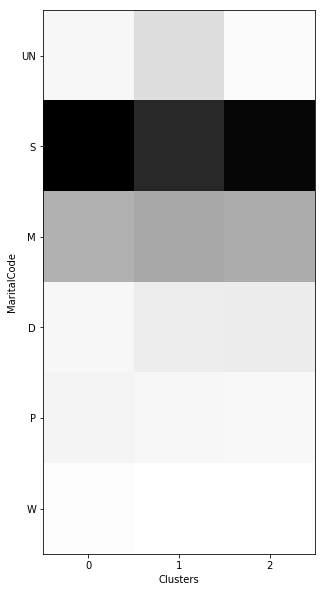

In [42]:
plotHeatMap(trainX.MaritalCode, aggClust.labels_)

##### LeadCategoryCode

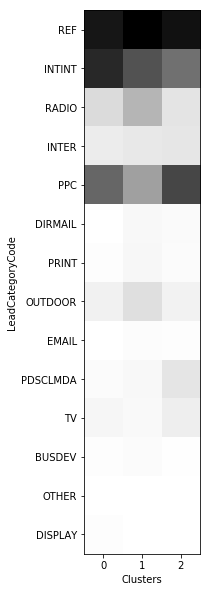

In [43]:
plotHeatMap(trainX.LeadCategoryCode, aggClust.labels_)

##### PrevEdCode

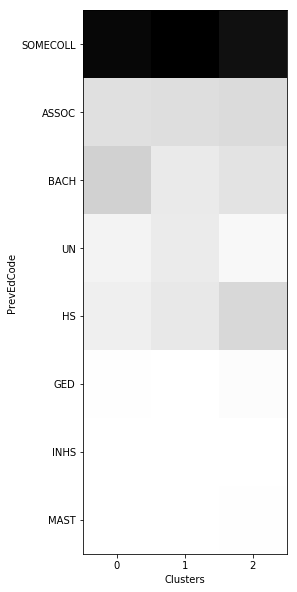

In [44]:
plotHeatMap(trainX.PrevEdCode, aggClust.labels_)

#### Students that might enroll:

It may be that representatives with codes 15, 9 and 3 had quite an impact on enrollment decision.  
  
Another suggestion is that candidates with LeadCategoryCode "Radio" tended to start a program.  
From another side, candidates with category code "PPC" might tend not to go into the program.  
  
Another suggestion is that students with Marital Code 'M' tended to start.

Students that might enroll based on previous heatmaps:

In [45]:
data.loc[
    (data['cancelFlag.x'] == 1) &
    (
        (data.MaritalCode == 'M') |
        (data.LeadCategoryCode == 'RADIO') | 
        (data.AdmRepName == 15) |
        (data.AdmRepName == 9) |
        (data.AdmRepName == 3)
    ), :]

,StuNum,avgYearPack,numYearAward,SexCode,MaritalCode,LeadCategoryCode,PrevEdCode,AdmRepName,ProgramCode,CitizenCode,IsHispanic,DDVeteran,cancelFlag.x
2,11244,7710.00,2,F,M,REF,ASSOC,30,2,US,2,0,1
33,10691,14071.00,1,F,M,INTER,SOMECOLL,31,1,US,2,0,1
179,10395,25963.00,1,F,M,PPC,SOMECOLL,7,2,US,2,0,1
256,10365,24657.00,1,F,M,PPC,BACH,14,2,US,2,0,1
306,10350,7213.00,1,F,D,RADIO,ASSOC,8,2,US,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,10769,15346.00,2,F,M,PPC,SOMECOLL,7,2,US,2,0,1
1973,12050,19722.75,2,F,M,OUTDOOR,SOMECOLL,14,2,US,2,0,1
2028,10130,9500.00,1,F,M,DIRMAIL,SOMECOLL,30,1,US,2,0,1
2193,10595,20337.50,2,F,M,REF,ASSOC,7,2,ELNC,2,0,1
